## 180330 processing of AeA - ZIKV wellGel experiment at Davis done 180330 - plate 1

Columns 1 was covered during the experiment and serve as control columns. Column 1 had gel. Controls loaded were:   
A1 ZIKV pos  
B1 AeA + ZIKV pos  
C1 AeA + ZIKV pos  
D1 AeA pos  
E-P1 NTC  

In [2]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from scipy.optimize import curve_fit
from scipy import interpolate
from skimage.draw import circle
from matplotlib.patches import Circle
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import pims
%matplotlib inline
def fitFunc(x, a, b):
    return a*x + b



In [3]:
D = '180330_AeAZIKV_plate1_01.xls'
d = pd.read_excel(D, sheetname='Amplification Data', header=30)
s = pd.read_excel(D, sheetname='Sample Setup', header=30)
cycles = np.arange(1,d.Cycle.max()+1,1)

In [4]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'ZIKV')]
NTCsT1

193     97
241    121
289    145
337    169
385    193
433    217
481    241
529    265
577    289
625    313
673    337
721    361
Name: Well, dtype: int64

th T1 = 0.0355833862944
3 + ZIKV RNA, Ct = 37.888
11 + ZIKV RNA, Ct = 36.555
15 + ZIKV RNA, Ct = 37.444
21 + ZIKV RNA, Ct = 36.111
29 + ZIKV RNA, Ct = 36.111
32 + ZIKV RNA, Ct = 37.888
42 + ZIKV RNA, Ct = 37.0
51 + ZIKV RNA, Ct = 37.0
70 + ZIKV RNA, Ct = 32.555
81 + ZIKV RNA, Ct = 38.777
102 + ZIKV RNA, Ct = 37.444
118 + ZIKV RNA, Ct = 39.666
127 + ZIKV RNA, Ct = 42.333
139 + ZIKV RNA, Ct = 39.222
143 + ZIKV RNA, Ct = 36.555
144 + ZIKV RNA, Ct = 37.0
150 + ZIKV RNA, Ct = 39.222
167 + ZIKV RNA, Ct = 36.111
170 + ZIKV RNA, Ct = 40.555
175 + ZIKV RNA, Ct = 38.777
176 + ZIKV RNA, Ct = 39.666
194 + ZIKV RNA, Ct = 36.555
195 + ZIKV RNA, Ct = 36.555
199 + ZIKV RNA, Ct = 39.222
211 + ZIKV RNA, Ct = 36.555
219 + ZIKV RNA, Ct = 38.777
225 + ZIKV RNA, Ct = 36.111
226 + ZIKV RNA, Ct = 40.555
234 + ZIKV RNA, Ct = 37.0
235 + ZIKV RNA, Ct = 36.111
245 + ZIKV RNA, Ct = 36.555
247 + ZIKV RNA, Ct = 36.111
259 + ZIKV RNA, Ct = 37.444
270 + ZIKV RNA, Ct = 37.888
272 + ZIKV RNA, Ct = 37.0
277 + ZIKV RNA, C

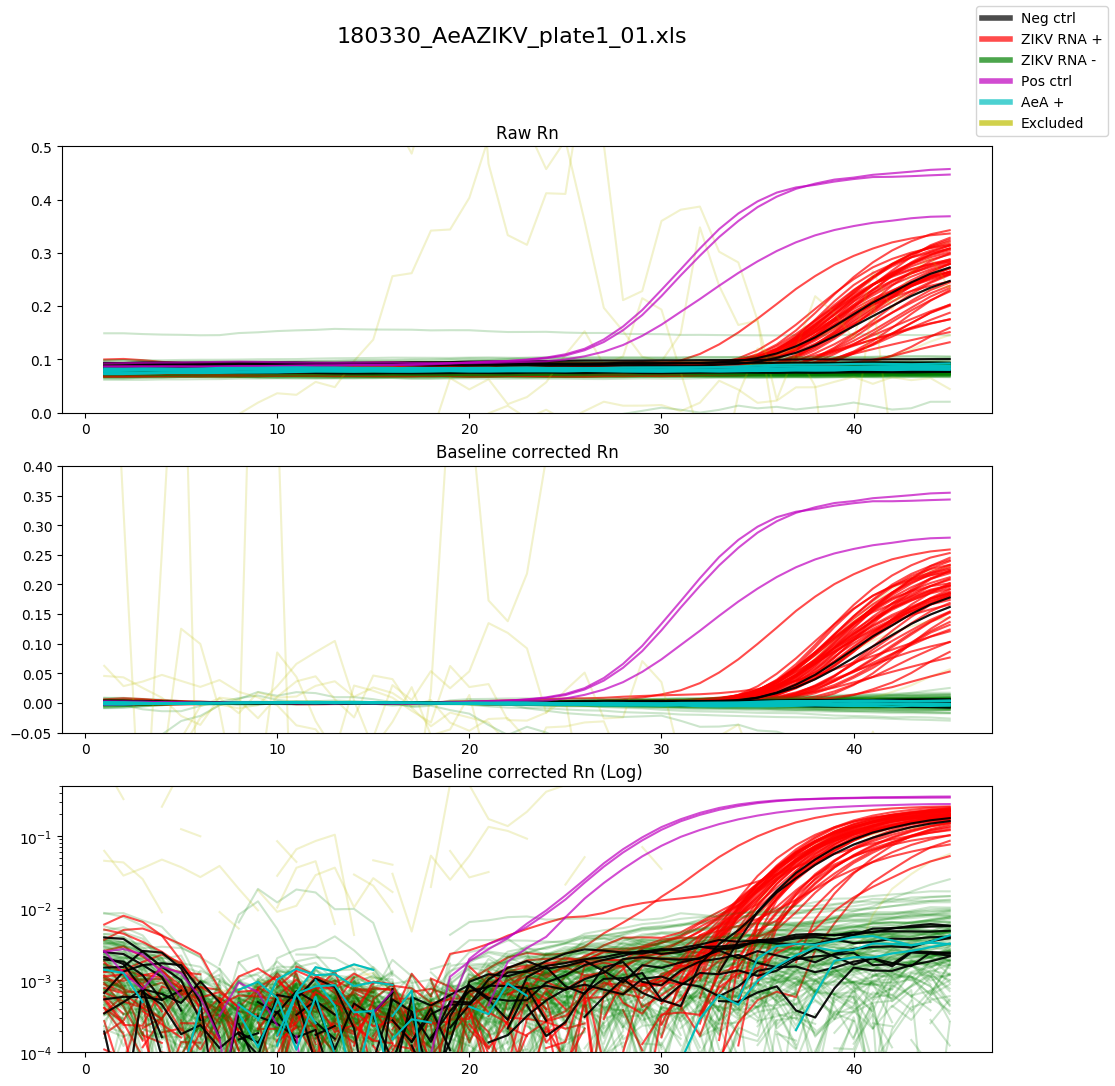

In [53]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'ZIKV')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'ZIKV')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'ZIKV')]

startBase = 4
stopBase = 20
baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,15))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 0.2 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
numPos = 0
numNeg = 0
posWellsZ = []


for i in UsT1.iteritems():
    if i[1] not in (1, 25, 49, 73):
        #print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if wN.max() > thresholdT1 and  sum(i for i in wN.values if i < 0) > -0.05: #np.diff(w[1:20]).min() > -0.1:
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
            print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
            #print(str(Ct))
            numPos = numPos + 1
            posWellsZ.append(i[1])
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'r',alpha=0.7)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn (Log)')
        if wN.max() > thresholdT1 and  sum(i for i in wN.values if i < 0) < -0.05:
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'y',alpha=0.2)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'y',alpha=0.2)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'y',alpha=0.2)
        if wN.max() < thresholdT1:
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'g',alpha=0.2)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'g',alpha=0.2)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'g',alpha=0.2)
        

print(numPos, ' positive wells')
print(numNeg, ' negative wells')
    
for i in SsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.9)
    plt.ylim((0,0.5))
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.9)
    plt.ylim((-.05,0.4))
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    plt.ylim((0.0001,0.5))
#    allNTCT1wN = allNTCT1wN.append(wN)

### Positive controls:
print('positive controls')
for i in UsT1.iteritems():
    if i[1] in (1, 25, 49):
        print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if wN.max() > thresholdT1: #and sum(i for i in wN.values if i < 0) > -0.05: #np.diff(w[1:20]).min() > -0.1:
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
            print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
            #print(str(Ct))
            #numPos = numPos + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'m',alpha=0.7)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'m',alpha=0.7)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'m',alpha=0.7)
            plt.title('Baseline corrected Rn (Log)')

### AeA positive:
print('AeA positive')
for i in UsT1.iteritems():
    if i[1] in posWellsA:
        #print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
#             Ct = xI[posI[0][0]]
#             print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        #print(str(Ct))
        #numPos = numPos + 1
        plt.subplot(3,1,1)
        plt.plot(cycles,w,'c',alpha=0.99)
        plt.title('Raw Rn')
        plt.subplot(3,1,2)
        plt.plot(cycles,wN,'c',alpha=0.99)
        plt.title('Baseline corrected Rn')
        plt.subplot(3,1,3)
        plt.semilogy(cycles,wN,'c',alpha=0.99)
        plt.title('Baseline corrected Rn (Log)')           
            
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'c', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'y', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['Neg ctrl', 'ZIKV RNA +', 'ZIKV RNA -', 'Pos ctrl','AeA +', 'Excluded'])

th T1 = 0.0539303554008
75 + AeA DNA, Ct = 37.888
184 + AeA DNA, Ct = 37.444
301 + AeA DNA, Ct = 39.666
325 + AeA DNA, Ct = 34.333
327 + AeA DNA, Ct = 38.777
341 + AeA DNA, Ct = 38.777
350 + AeA DNA, Ct = 39.666
7  positive wells
367  negative wells
positive controls
ZIKV positive


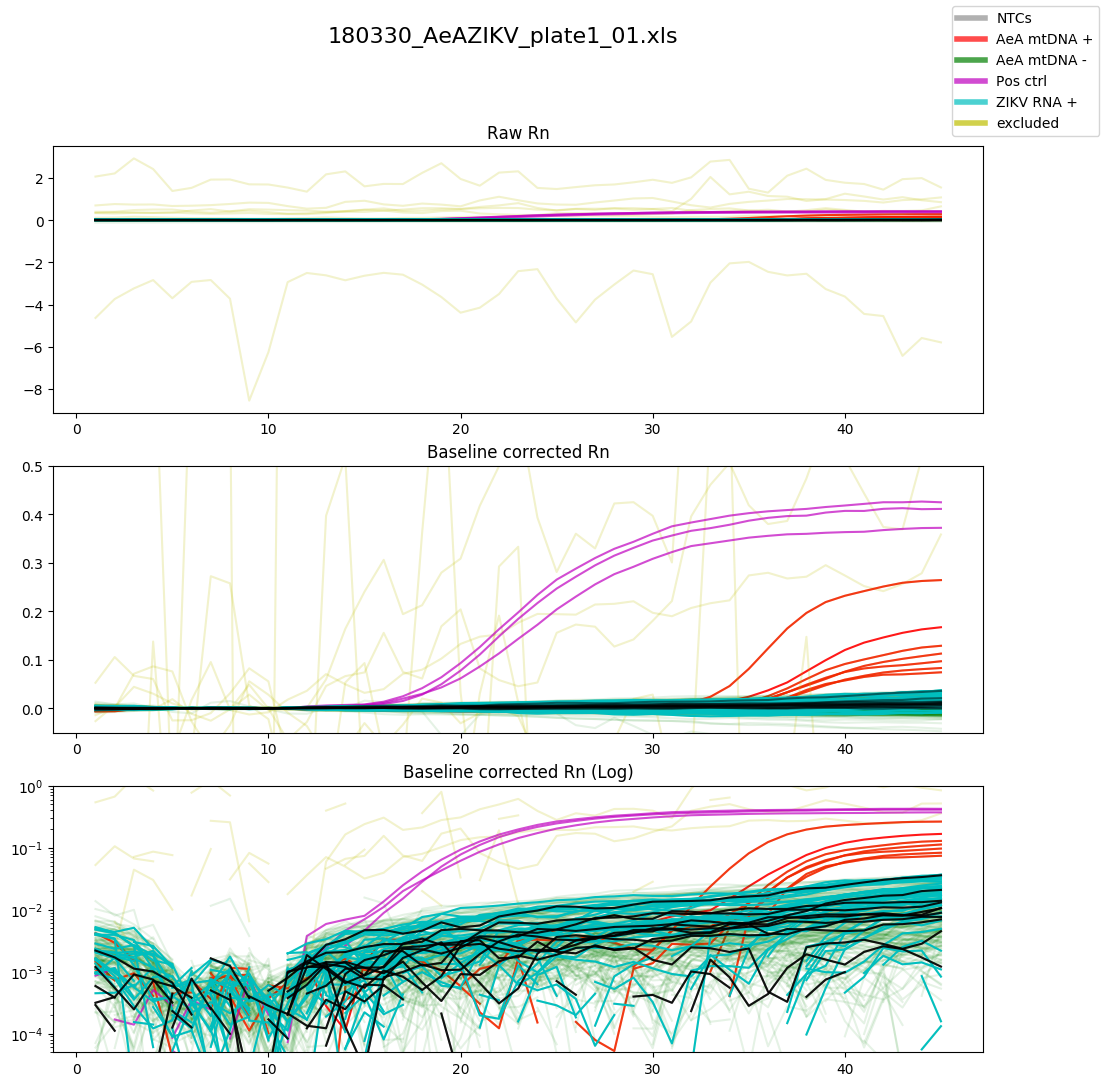

In [33]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'AeA')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'AeA')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'AeA')]

startBase = 4
stopBase = 11
baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
posWellsA = []
    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.00005,1))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 1.5 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
numPos = 0
numNeg = 0

#or 37 or 49 or 61 or 73 or 85

for i in UsT1.iteritems():
    if i[1] not in (1, 25, 49, 73):
        #print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if wN.max() > thresholdT1 and  sum(i for i in np.diff(wN.values) if i < 0) > -0.05: #np.diff(w[1:20]).min() > -0.1:
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
            print(str(i[1])+' + AeA DNA, Ct = ' + str(str(Ct)[:6]))
            #print(str(Ct))
            numPos = numPos + 1
            posWellsA.append(i[1])
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'r',alpha=0.9)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'r',alpha=0.9)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'r',alpha=0.9)
            plt.title('Baseline corrected Rn (Log)')
        if wN.max() > thresholdT1 and  sum(i for i in wN.values if i < 0) < -0.01:
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'y',alpha=0.2)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'y',alpha=0.2)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'y',alpha=0.2)
        if wN.max() < thresholdT1:
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'g',alpha=0.1)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'g',alpha=0.1)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'g',alpha=0.1)
        

print(numPos, ' positive wells')
print(numNeg, ' negative wells')
    
for i in SsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    


### Positive controls:
print('positive controls')
for i in UsT1.iteritems():
    if i[1] in (25, 49, 73):
        #print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        #if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
#             Ct = xI[posI[0][0]]
#             print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        #print(str(Ct))
        #numPos = numPos + 1
        plt.subplot(3,1,1)
        plt.plot(cycles,w,'m',alpha=0.7)
        plt.title('Raw Rn')
        plt.subplot(3,1,2)
        plt.plot(cycles,wN,'m',alpha=0.7)
        plt.title('Baseline corrected Rn')
        plt.subplot(3,1,3)
        plt.semilogy(cycles,wN,'m',alpha=0.7)
        plt.title('Baseline corrected Rn (Log)')
            
### ZIKV positive:
print('ZIKV positive')
for i in UsT1.iteritems():
    if i[1] in posWellsZ:
        #print(i[1])
        w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
#             Ct = xI[posI[0][0]]
#             print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        #print(str(Ct))
        #numPos = numPos + 1
        plt.subplot(3,1,1)
        plt.plot(cycles,w,'c',alpha=0.99)
        plt.title('Raw Rn')
        plt.subplot(3,1,2)
        plt.plot(cycles,wN,'c',alpha=0.99)
        plt.title('Baseline corrected Rn')
        plt.subplot(3,1,3)
        plt.semilogy(cycles,wN,'c',alpha=0.99)
        plt.title('Baseline corrected Rn (Log)')

for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.5)
    #plt.ylim((0.1,0.5))
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.5)
    plt.ylim((-.05,0.5))
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    #plt.ylim((0.0001,0.5))
#    allNTCT1wN = allNTCT1wN.append(wN)            
            
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'c', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'y', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['NTCs', 'AeA mtDNA +', 'AeA mtDNA -', 'Pos ctrl', 'ZIKV RNA +', 'excluded'])

In [24]:
np.diff(wN.values)
sum(i for i in np.diff(wN.values) if i < 0)

-0.0039863457217130657

In [ ]:
fig=plt.figure(figsize=(8, 10), dpi=100)


wA = d["Rn"][(d["Well"] == 231) & (d["Target Name"] == 'AeA')]
fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wA.values[baselineCyc])
baseline = fitParams[0]*cycles + fitParams[1]
wN = wA - baseline
f = interpolate.interp1d(cycles, wN)
wNI = f(xI)
posI = np.where(wNI > thresholdT1)
plt.subplot(3,1,1)
plt.plot(cycles,wA,'c',alpha=0.99)
plt.title('Raw Rn')
plt.subplot(3,1,2)
plt.plot(cycles,wN,'c',alpha=0.99)
plt.title('Baseline corrected Rn')
plt.subplot(3,1,3)
plt.semilogy(cycles,wN,'c',alpha=0.99)
plt.title('Baseline corrected Rn (Log)')

wZ = d["Rn"][(d["Well"] == 231) & (d["Target Name"] == 'ZIKV')]
fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wZ.values[baselineCyc])
baseline = fitParams[0]*cycles + fitParams[1]
wN = wZ - baseline
f = interpolate.interp1d(cycles, wN)
wNI = f(xI)
posI = np.where(wNI > thresholdT1)
plt.subplot(3,1,1)
plt.plot(cycles,wZ,'r',alpha=0.99)
plt.title('Raw Rn')
plt.subplot(3,1,2)
plt.plot(cycles,wN,'r',alpha=0.99)
plt.title('Baseline corrected Rn')
plt.subplot(3,1,3)
plt.semilogy(cycles,wN,'r',alpha=0.99)
plt.title('Baseline corrected Rn (Log)')

In [34]:
CoorS1 = np.load('coordinatesAll180330_ZIKVplate1_01.npy')
headShotRes= pims.ImageSequence('*.jpg', as_grey=True)
#posWells = ['G2', 'H9'] 

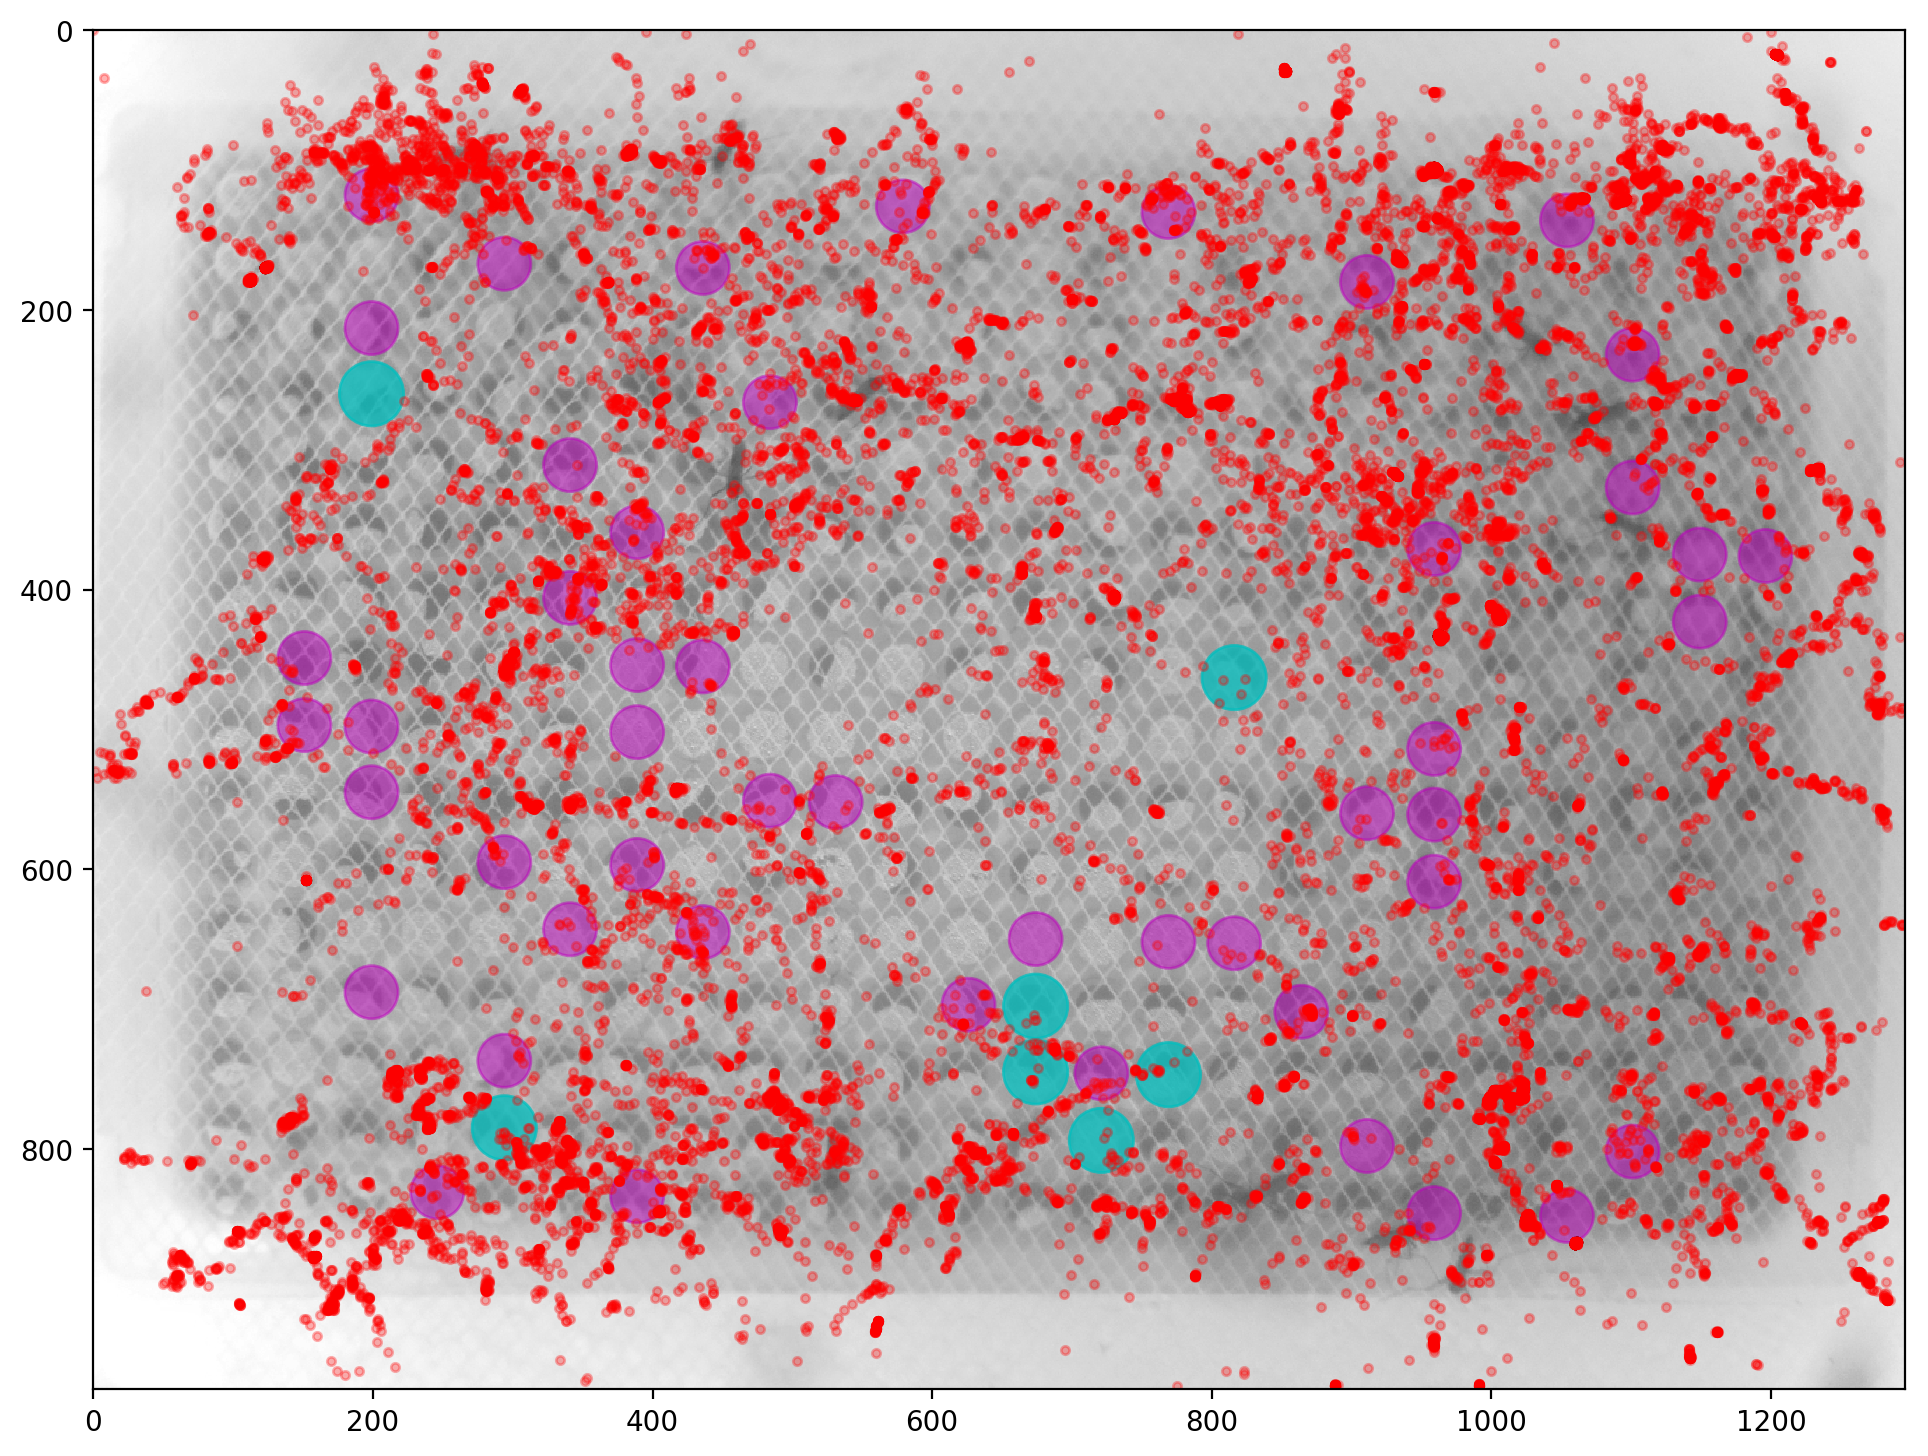

In [54]:
x_topleft = 116
y_topleft = 104
pitch = 47.5
x_tilt = np.floor(1 / 23)
y_tilt = np.floor(17 / 15)
num_rows = 16
num_columns = 24
radius = 21
wells = np.zeros((972,1296,3), dtype=np.double)

#fig = plt.figure(figsize=(12, 9), dpi=100)
fig,ax = plt.subplots(1, figsize=(12, 9), dpi=200)
ax.set_aspect('equal')
ax.imshow(headShotRes[0], cmap='gray', alpha = 0.7)

for i in posWellsA:
#     w = str(i)
#     row = int(w[1:3]) - 1
#     col = ord(w[0]) - 65
    row = np.floor_divide(i-1,num_columns)
#     print(row)
    col = (i - (row) * 24) -1
#     print(col)
    x = x_topleft + row * pitch + col * y_tilt
    x = int(x)
    y = y_topleft + col * pitch + row * x_tilt
    y = int(y)
    #cc = Circle(y, x, radius, wells.shape)
    cc = Circle((y, x), radius + 2, color='c', alpha = 0.75)
    ax.add_patch(cc)
    #wells[cc] = 1

for i in posWellsZ:
#     w = str(i)
#     row = int(w[1:3]) - 1
#     col = ord(w[0]) - 65
    row = np.floor_divide(i-1,num_columns)
#     print(row)
    col = (i - (row) * 24) -1
#     print(col)
    x = x_topleft + row * pitch + col * y_tilt
    x = int(x)
    y = y_topleft + col * pitch + row * x_tilt
    y = int(y)
    #cc = Circle(y, x, radius, wells.shape)
    cc = Circle((y, x), radius - 2, color='m', alpha = 0.5)
    ax.add_patch(cc)
    #wells[cc] = 1
    

    
plt.plot(CoorS1[:,1], CoorS1[:,0], '.r', alpha = 0.3)
well_labels = label(wells)

In [ ]:
x_topleft = 100
y_topleft = 212
pitch = 94.5
x_tilt = np.floor(-16 / 11)
y_tilt = np.floor(4 / 7)
num_rows = 8
num_columns = 12
radius = 36
wells = np.zeros((972,1296,3), dtype=np.double)

#fig = plt.figure(figsize=(12, 9), dpi=100)
fig,ax = plt.subplots(1, figsize=(12, 9), dpi=100)
ax.set_aspect('equal')
ax.imshow(headShotRes[0], cmap='gray')

for i in posWells:
    w = str(i)
    row = int(w[1:3]) - 1
    col = ord(w[0]) - 65
    x = x_topleft + row * pitch + col * y_tilt
    x = int(x)
    y = y_topleft + col * pitch + row * x_tilt
    y = int(y)
    #cc = Circle(y, x, radius, wells.shape)
    cc = Circle((x, y), radius,color='k', alpha = 0.4)
    ax.add_patch(cc)
    #wells[cc] = 1
    
plt.plot(CoorS1[:,1], CoorS1[:,0], '.r', alpha = 0.3)
well_labels = label(wells)

In [ ]:
fig=plt.figure(figsize=(8, 10), dpi=100)


wA = d["Rn"][(d["Well"] == 361) & (d["Target Name"] == 'AeA')]
fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wA.values[baselineCyc])
baseline = fitParams[0]*cycles + fitParams[1]
wN = wA - baseline
f = interpolate.interp1d(cycles, wN)
wNI = f(xI)
posI = np.where(wNI > thresholdT1)
plt.subplot(3,1,1)
plt.plot(cycles,wA,'c',alpha=0.99)
plt.title('Raw Rn')
plt.subplot(3,1,2)
plt.plot(cycles,wN,'c',alpha=0.99)
plt.title('Baseline corrected Rn')
plt.subplot(3,1,3)
plt.semilogy(cycles,wN,'c',alpha=0.99)
plt.title('Baseline corrected Rn (Log)')

wZ = d["Rn"][(d["Well"] == 361) & (d["Target Name"] == 'ZIKV')]
fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wZ.values[baselineCyc])
baseline = fitParams[0]*cycles + fitParams[1]
wN = wZ - baseline
f = interpolate.interp1d(cycles, wN)
wNI = f(xI)
posI = np.where(wNI > thresholdT1)
plt.subplot(3,1,1)
plt.plot(cycles,wZ,'r',alpha=0.99)
plt.title('Raw Rn')
plt.subplot(3,1,2)
plt.plot(cycles,wN,'r',alpha=0.99)
plt.title('Baseline corrected Rn')
plt.subplot(3,1,3)
plt.semilogy(cycles,wN,'r',alpha=0.99)
plt.title('Baseline corrected Rn (Log)')

In [ ]:
fig=plt.figure(figsize=(8, 17), dpi=100)

startBase = 4
stopBase = 25
baselineCyc = np.arange(startBase,stopBase,1)

for i in posWellsZ:
    #print(i)
    wA = d["Rn"][(d["Well"] == i) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wA.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = wA - baseline
    f = interpolate.interp1d(cycles, wN)
    wNI = f(xI)
    posI = np.where(wNI > thresholdT1)
    plt.subplot(3,1,1)
    plt.plot(cycles,wA,'c',alpha=0.8)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'c',alpha=0.8)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'c',alpha=0.8)
    plt.title('Baseline corrected Rn (Log)')

    wZ = d["Rn"][(d["Well"] == i) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], wZ.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = wZ - baseline
    f = interpolate.interp1d(cycles, wN)
    wNI = f(xI)
    posI = np.where(wNI > thresholdT1)
    plt.subplot(3,1,1)
    plt.plot(cycles,wZ,'r',alpha=0.4)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'r',alpha=0.4)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'r',alpha=0.4)
    plt.title('Baseline corrected Rn (Log)')
    plt.ylim((0.0001,0.5))

In [ ]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'AeA')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'AeA')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'AeA')]

startBase = 3
stopBase = 18
baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
    
for i in NTCsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,15))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 4 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
numPos = 0
numNeg = 0

#or 37 or 49 or 61 or 73 or 85

for i in UsT1.iteritems():
    if i[1] not in (1, 12, 24, 36, 48, 25, 37, 49, 61, 73, 85):
        #print(i[1])
        w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if wN.max() > thresholdT1 and np.diff(w[1:20]).min() > -0.1:
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
            print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
            #print(str(Ct))
            numPos = numPos + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'r',alpha=0.7)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'r',alpha=0.7)
            plt.title('Baseline corrected Rn (Log)')
        if wN.max() < thresholdT1:
            numNeg = numNeg + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'g',alpha=0.2)
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'g',alpha=0.2)
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'g',alpha=0.2)
        

print(numPos, ' positive wells')
print(numNeg, ' negative wells')
    
for i in SsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    
for i in NTCsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.1)
    #plt.ylim((-.1,0.3))
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.1)
    plt.ylim((-.05,0.05))
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    plt.ylim((0.00001,0.5))
#    allNTCT1wN = allNTCT1wN.append(wN)

### Positives:
for i in UsT1.iteritems():
    if i[1] in (1, 48, 24, 36):
        #print(i[1])
        w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        if wN.max() > thresholdT1 and np.diff(w[1:20]).min() > -0.1:
            f = interpolate.interp1d(cycles, wN)
            wNI = f(xI)
            posI = np.where(wNI > thresholdT1)
            Ct = xI[posI[0][0]]
            print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
            print(str(Ct))
            #numPos = numPos + 1
            plt.subplot(3,1,1)
            plt.plot(cycles,w,'m',alpha=0.1)
            plt.title('Raw Rn')
            plt.subplot(3,1,2)
            plt.plot(cycles,wN,'m',alpha=0.1)
            plt.title('Baseline corrected Rn')
            plt.subplot(3,1,3)
            plt.semilogy(cycles,wN,'m',alpha=0.1)
            plt.title('Baseline corrected Rn (Log)')

for i in UsT1.iteritems():
    if i[1] in (46, 68, 81):
        #print(i[1])
        w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
        fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
        baseline = fitParams[0]*cycles + fitParams[1]
        wN = w - baseline
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
#         Ct = xI[posI[0][0]]
#         print(str(i[1])+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
#         print(str(Ct))
        #numPos = numPos + 1
        plt.subplot(3,1,1)
        plt.plot(cycles,w,'b',alpha=0.7)
        plt.title('Delta Rn')
        plt.subplot(3,1,2)
        plt.plot(cycles,wN,'b',alpha=0.7)
        plt.title('Baseline corrected Rn')
        plt.subplot(3,1,3)
        plt.semilogy(cycles,wN,'b',alpha=0.7)
        plt.title('Baseline corrected Rn (Log)')
            
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'b', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['NTCs', 'AeA mtDNA +', 'AeA mtDNA -', 'ZIKV RNA +', 'Pos ctrl'])

In [ ]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'ZIKV')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'ZIKV')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'ZIKV')]

# NTCsT2 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'Target 2')]
# UsT2 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'Target 2')]
# SsT2 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'Target 2')]

baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'AeA')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,15))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 1.5 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
# for i in UsT1.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT1:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT1)
#         #Ct = xI[posI[0][0]]
#         #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,1,1)
#     plt.plot(cycles,w,'r',alpha=0.2)
#     plt.title('Raw Rn')
#     plt.subplot(3,1,2)
#     plt.plot(cycles,wN,'r',alpha=0.2)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,1,3)
#     plt.semilogy(cycles,wN,'r',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')

for i in SsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        #Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.9)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.9)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    plt.ylim((0.0001,15))
#    allNTCT1wN = allNTCT1wN.append(wN)
    
#### target 2

# allNTCT2wN = pd.Series()

# for i in NTCsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'k',alpha=0.3)
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'k',alpha=0.3)
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'k',alpha=0.3)
#     plt.ylim((0.0001,0.2))
#     allNTCT2wN = allNTCT2wN.append(wN)

# thresholdT2 = 10 * allNTCT2wN.max()
    
# for i in UsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT2:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT2)
#         Ct = xI[posI[0][0]]
#         print(i[1]+' + AeA mtDNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'g',alpha=0.7)
#     plt.title('Raw Rn')
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'g',alpha=0.7)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'g',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')
    
# for i in SsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT2:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT2)
#         Ct = xI[posI[0][0]]
#         print(i[1]+' + AeA mtDNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'m',alpha=0.7)
#     plt.title('Raw Rn')
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'m',alpha=0.7)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'m',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')
    
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['NTCs', 'ZIKV RNA', 'AeA mtDNA', 'STDs'])

In [ ]:
i[1]

In [ ]:
allNTCT1wN

In [ ]:
baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
STDData = pd.DataFrame(columns = ['well', 'quantity', 'Ct'])

    
for i in NTCsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,0.7))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 1.5 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
for i in UsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'r',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'r',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'r',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

for i in SsT1.iteritems():
    w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 1')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        Q = float(s["Quantity"][(s["Well"] == i[1]) & (s["Target Name"] == 'Target 1')])
        STDData = STDData.append({"well": i[1], "quantity": Q, "Ct": Ct}, ignore_index=True)
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')


    
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['Negative Control', 'ZIKV RNA', 'AeA mtDNA'])

In [ ]:
NTCsT1 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'ZIKV')]
UsT1 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'ZIKV')]
SsT1 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'ZIKV')]

# NTCsT2 = s["Well"][(s["Task"] == 'NTC')   & (s["Target Name"] == 'Target 2')]
# UsT2 = s["Well"][(s["Task"] == 'UNKNOWN') & (s["Target Name"] == 'Target 2')]
# SsT2 = s["Well"][(s["Task"] == 'STANDARD') & (s["Target Name"] == 'Target 2')]

baselineCyc = np.arange(startBase,stopBase,1)

fig=plt.figure(figsize=(12, 12), dpi=100)
plt.suptitle(D, fontsize=16)
    
#### target 1

allNTCT1wN = pd.Series()
    
for i in NTCsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.3)
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.3)
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.3)
    plt.ylim((0.0001,15))
    allNTCT1wN = allNTCT1wN.append(wN)

thresholdT1 = 1.5 * allNTCT1wN.max()
print('th T1 = '+ str(thresholdT1))

xI = np.linspace(1, cycles.max(), 100)
    
numPos = 0
numNeg = 0
    
for i in UsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
        #print(str(Ct))
        numPos = numPos + 1
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'r',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'r',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'r',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')
    if wN.max() < thresholdT1:
        numNeg = numNeg + 1
        

print(numPos, ' positive wells')
print(numNeg, ' positive wells')
    
for i in SsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    if wN.max() > thresholdT1:
        f = interpolate.interp1d(cycles, wN)
        wNI = f(xI)
        posI = np.where(wNI > thresholdT1)
        Ct = xI[posI[0][0]]
        #print(i[1]+' + ZIKV RNA, Ct = ' + str(str(Ct)[:6]))
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'m',alpha=0.7)
    plt.title('Raw Rn')
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn')
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'m',alpha=0.7)
    plt.title('Baseline corrected Rn (Log)')

    
for i in NTCsT1.iteritems():
    w = d["Delta Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'ZIKV')]
    fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
    baseline = fitParams[0]*cycles + fitParams[1]
    wN = w - baseline
    plt.subplot(3,1,1)
    plt.plot(cycles,w,'k',alpha=0.9)
    plt.ylim((0,0.5))
    plt.subplot(3,1,2)
    plt.plot(cycles,wN,'k',alpha=0.9)
    plt.ylim((0,0.5))
    plt.subplot(3,1,3)
    plt.semilogy(cycles,wN,'k',alpha=0.9)
    plt.ylim((0.0001,15))
#    allNTCT1wN = allNTCT1wN.append(wN)
    
#### target 2

# allNTCT2wN = pd.Series()

# for i in NTCsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'k',alpha=0.3)
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'k',alpha=0.3)
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'k',alpha=0.3)
#     plt.ylim((0.0001,0.2))
#     allNTCT2wN = allNTCT2wN.append(wN)

# thresholdT2 = 10 * allNTCT2wN.max()
    
# for i in UsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT2:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT2)
#         Ct = xI[posI[0][0]]
#         print(i[1]+' + AeA mtDNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'g',alpha=0.7)
#     plt.title('Raw Rn')
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'g',alpha=0.7)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'g',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')
    
# for i in SsT2.iteritems():
#     w = d["Rn"][(d["Well"] == i[1]) & (d["Target Name"] == 'Target 2')]
#     fitParams, fitCovariances = curve_fit(fitFunc, cycles[baselineCyc], w.values[baselineCyc])
#     baseline = fitParams[0]*cycles + fitParams[1]
#     wN = w - baseline
#     if wN.max() > thresholdT2:
#         f = interpolate.interp1d(cycles, wN)
#         wNI = f(xI)
#         posI = np.where(wNI > thresholdT2)
#         Ct = xI[posI[0][0]]
#         print(i[1]+' + AeA mtDNA, Ct = ' + str(str(Ct)[:6]))
#     plt.subplot(3,2,2)
#     plt.plot(cycles,w,'m',alpha=0.7)
#     plt.title('Raw Rn')
#     plt.subplot(3,2,4)
#     plt.plot(cycles,wN,'m',alpha=0.7)
#     plt.title('Baseline corrected Rn')
#     plt.subplot(3,2,6)
#     plt.semilogy(cycles,wN,'m',alpha=0.7)
#     plt.title('Baseline corrected Rn (Log)')
    
custom_lines = [Line2D([0], [0], color = 'k', lw=4, alpha = 0.3),
                Line2D([0], [0], color = 'r', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'g', lw=4, alpha = 0.7),
                Line2D([0], [0], color = 'm', lw=4, alpha = 0.7)]

_=fig.legend(custom_lines, ['NTCs', 'ZIKV RNA', 'AeA mtDNA', 'STDs'])

In [ ]:
STDData

In [ ]:
fitP, fitC = curve_fit(fitFunc, np.log10(STDData.quantity), STDData.Ct)
plt.plot(np.log10(STDData.quantity), STDData.Ct,'.r')
plt.plot(np.log10(STDData.quantity), fitP[0] * np.array(np.log10(STDData.quantity)) + fitP[1])

In [ ]:
efficiency = 10**(-1/fitP[0])-1
print('efficiency = ' + str(efficiency))